In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = 'ontario_data/'
# today
df = pd.read_csv(path + 'conposcovidloc(4-12).csv')
df.columns = [x.lower() for x in df.columns]
# df = df.loc[df['reporting_phu_city']=='Toronto']
df = df.groupby('accurate_episode_date')

# yesterday

df2 = pd.read_csv(path + 'conposcovidloc(4-11).csv')
df2.columns = [x.lower() for x in df2.columns]
# df = df.loc[df['reporting_phu_city']=='Toronto']
df2 = df2.groupby('accurate_episode_date')



#next day
df3 = pd.read_csv(path + 'conposcovidloc(4-8).csv')
df3.columns = [x.lower() for x in df3.columns]
# df = df.loc[df['reporting_phu_city']=='Toronto']
df3 = df3.groupby('accurate_episode_date')


X2 = df.count().iloc[:,1]
X = df2.count().iloc[:,1]
X3 = df3.count().iloc[:,1]


In [3]:
from math import exp, sqrt
from scipy import optimize


#guassian function
def fx(x, a,b,c):
    return a*np.exp(-(x-b)**2/(2*(c**2)))


rsquare: 0.8902177765742618


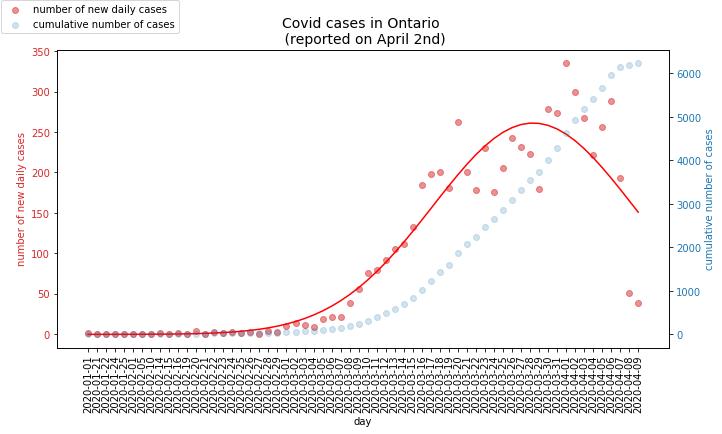

In [4]:
# Figure 1
Xc = pd.DataFrame(X)
Xc['total'] = Xc.cumsum()
Xc = Xc.reset_index(drop=False)

Xc = Xc.rename(columns={'accurate_episode_date':'date', 'age_group': 'daily'})



data1 = [Xc['date'], Xc['daily']]
data2 = [Xc['date'], Xc['total']]

fig, ax1 = plt.subplots(facecolor='w', figsize=(10,6))

color = 'tab:red'
ax1.set_xlabel('day')
ax1.set_ylabel('number of new daily cases', color=color)
ax1.scatter(*data1, color=color, alpha = 0.5, label='number of new daily cases')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=90)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('cumulative number of cases', color=color)  # we already handled the x-label with ax1
ax2.scatter(*data2, color=color, alpha=0.2, label = 'cumulative number of cases')
ax2.tick_params(axis='y', labelcolor=color)

Xx = np.array(Xc.index)
yy = np.array(Xc['daily'])

# regression
bounds = ([50,15,0],[20000,90,20])
params0, params_cov = optimize.curve_fit(fx,Xx,yy, bounds=bounds)
# print(params)

# residuals
residuals = yy - fx(Xx,*params0)
ssres = np.sum(residuals**2)
sstot = np.sum((yy-np.mean(yy))**2)
rsquared = 1-(ssres/sstot)
print('rsquare: {}'.format(rsquared))

ax1.plot(fx(Xx,*params0), c='r')
ax1.set_title('Covid cases in Ontario \n (reported on April 2nd)'.format(rsquared), fontsize=14)

fig.legend(borderaxespad=0.1, loc='upper left')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.tight_layout()

plt.savefig('./o_figures/figure1.png', dpi=300)

plt.show()


rsquare: 0.9020602328927511


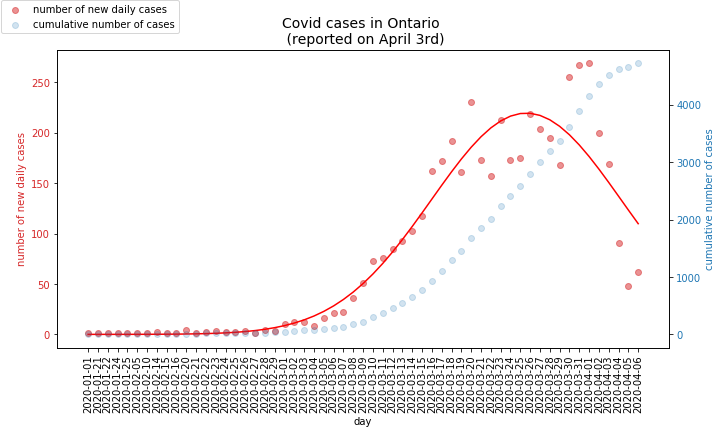

In [5]:
# Figure 2
Xc = pd.DataFrame(X3)
Xc['total'] = Xc.cumsum()
Xc = Xc.reset_index(drop=False)

Xc = Xc.rename(columns={'accurate_episode_date':'date', 'age_group': 'daily'})



data1 = [Xc['date'], Xc['daily']]
data2 = [Xc['date'], Xc['total']]

fig, ax1 = plt.subplots(facecolor='w', figsize=(10,6))

color = 'tab:red'
ax1.set_xlabel('day')
ax1.set_ylabel('number of new daily cases', color=color)
ax1.scatter(*data1, color=color, alpha = 0.5, label='number of new daily cases')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=90)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('cumulative number of cases', color=color)  # we already handled the x-label with ax1
ax2.scatter(*data2, color=color, alpha=0.2, label = 'cumulative number of cases')
ax2.tick_params(axis='y', labelcolor=color)

Xx = np.array(Xc.index)
yy = np.array(Xc['daily'])

# regression
bounds = ([50,15,0],[20000,90,20])
params, params_cov = optimize.curve_fit(fx,Xx,yy, bounds=bounds)
# print(params)

# residuals
residuals = yy - fx(Xx,*params)
ssres = np.sum(residuals**2)
sstot = np.sum((yy-np.mean(yy))**2)
rsquared = 1-(ssres/sstot)
print('rsquare: {}'.format(rsquared))

ax1.plot(fx(Xx,*params), c='r')
ax1.set_title('Covid cases in Ontario \n (reported on April 3rd)'.format(rsquared), fontsize=14)

fig.legend(borderaxespad=0.1, loc='upper left')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.tight_layout()
plt.savefig('./o_figures/figure2.png', dpi=300)


plt.show()


In [6]:
from datetime import datetime, date
now = datetime.now()
d0 = datetime(2020, 1, 21)

# timespan = now - d0


latest_date = datetime.strptime(Xc['date'].iloc[-1],'%Y-%m-%d')


delta = now-latest_date



C:\Users\Eric\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


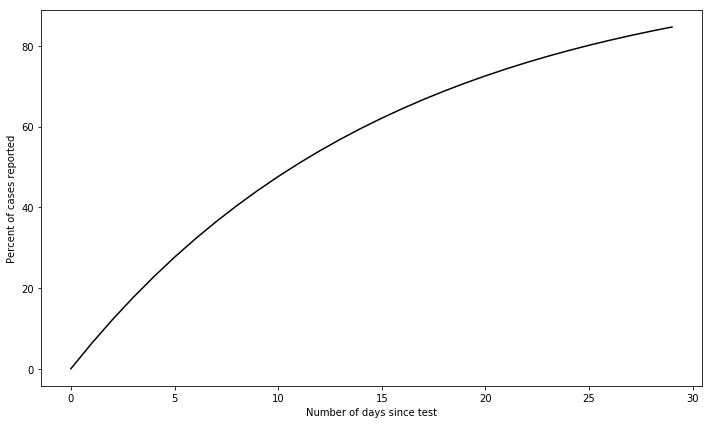

In [7]:
# figure 3
# modeling exponential hazard

x = np.linspace(0,30,30) # days

def complete(r,t): #exponential hazard
    return 1 - np.exp(-r*t)

r = 1/16   # 1/average time of onset to reportin



y = complete(r,x)

def lag_cases(y):
    return 1/y

yy = lag_cases(y)


plt.figure(figsize=(10,6))
plt.plot(y*100, c='k')
# plt.plot(yy)
plt.yticks()

plt.xlabel('Number of days since test')
plt.ylabel('Percent of cases reported')
plt.tight_layout()
plt.savefig('./o_figures/figure3.png', dpi=300)

plt.show()



In [8]:
yy

array([        inf, 15.97205422,  8.24410619,  5.67170922,  4.3881944 ,
        3.62022618,  3.11002457,  2.74711119,  2.4762458 ,  2.26673843,
        2.10017429,  1.96483415,  1.85290455,  1.7589756 ,  1.67918257,
        1.61069087,  1.55137414,  1.49960598,  1.45412106,  1.41392016,
        1.37820364,  1.34632392,  1.31775097,  1.29204675,  1.26884608,
        1.24784206,  1.22877487,  1.21142312,  1.19559692,  1.18113254])

In [9]:
corrected = Xc
days_to_add = len(corrected) - len(yy[:-delta.days])
for ones in range(days_to_add):
    yy = np.append(yy,1)
    
corrected['lag_factor'] = yy[::-1][:-delta.days].tolist() #reverses array

corrected['corrected_daily'] = corrected['daily'] * corrected['lag_factor']
corrected['corrected_total'] = Xc['corrected_daily'].cumsum()

8.342981186685963


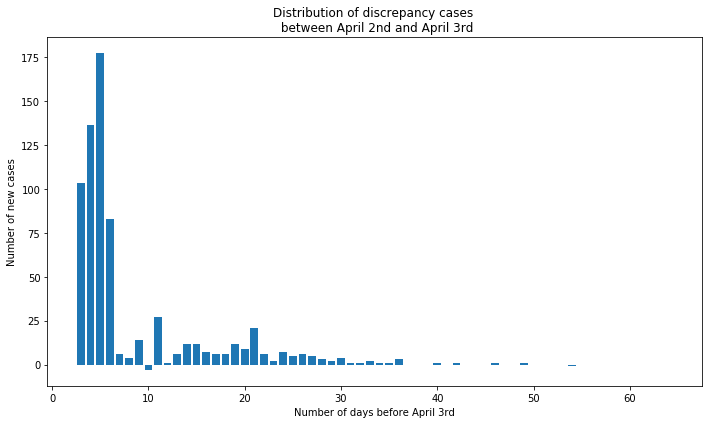

In [10]:
# Figure 4
# getting TAT
delta_cases = X2-X
# delta_cases = delta_cases.set_value('2020-04-02', 48) # adding 48 new cases
delta_cases= delta_cases.reset_index(drop=True)

days = [day for day in range(1,len(delta_cases)+1)]
days_s = pd.Series(days[::-1]) 

new_cases = pd.concat([delta_cases, days_s], ignore_index=False, axis=1)
new_cases = new_cases.rename(columns={'age_group':'new_cases',0:'days'})
new_cases['mult']=new_cases['new_cases']*new_cases['days']
avg_TAT = new_cases['mult'].sum()/new_cases['new_cases'].sum()


plt.figure(figsize=(10,6))
plt.title('Distribution of discrepancy cases \n between April 2nd and April 3rd')
plt.bar(x=new_cases['days'],height = new_cases['new_cases'])
plt.xlabel('Number of days before April 3rd')
plt.ylabel('Number of new cases')
plt.tight_layout()
plt.savefig('./o_figures/figure4.png', dpi=300)
print(avg_TAT)


rsquare: 0.8866587464555129


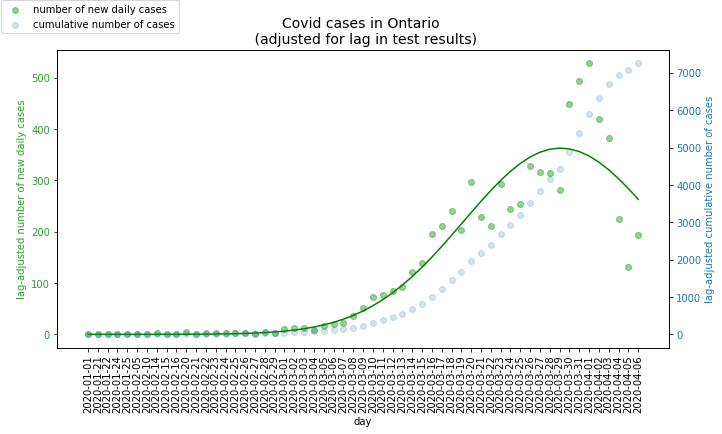

In [11]:
# Figure 5
data1 = [corrected['date'], corrected['corrected_daily']]
data2 = [corrected['date'], corrected['corrected_total']]

fig, ax1 = plt.subplots(facecolor='w', figsize=(10,6))

color = 'tab:green'
ax1.set_xlabel('day')
ax1.set_ylabel('lag-adjusted number of new daily cases', color=color)
ax1.scatter(*data1, color=color, alpha = 0.5, label='number of new daily cases')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=90)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('lag-adjusted cumulative number of cases', color=color)  # we already handled the x-label with ax1
ax2.scatter(*data2, color=color, alpha=0.2, label = 'cumulative number of cases')
ax2.tick_params(axis='y', labelcolor=color)

Xx = np.array(corrected.index)
yy = np.array(corrected['corrected_daily'])

# regression
bounds = ([50,15,0],[20000,90,20])
c_params, params_cov = optimize.curve_fit(fx,Xx,yy, bounds=bounds)
# print(params)

# residuals
residuals = yy - fx(Xx,*c_params)
ssres = np.sum(residuals**2)
sstot = np.sum((yy-np.mean(yy))**2)
rsquared = 1-(ssres/sstot)
print('rsquare: {}'.format(rsquared))

ax1.plot(fx(Xx,*c_params), c='g')
ax1.set_title('Covid cases in Ontario \n (adjusted for lag in test results)'.format(rsquared), fontsize=14)

fig.legend(borderaxespad=0.1, loc='upper left')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

# plt.tight_layout()

plt.savefig('./o_figures/figure5.png', dpi=300)

plt.show()


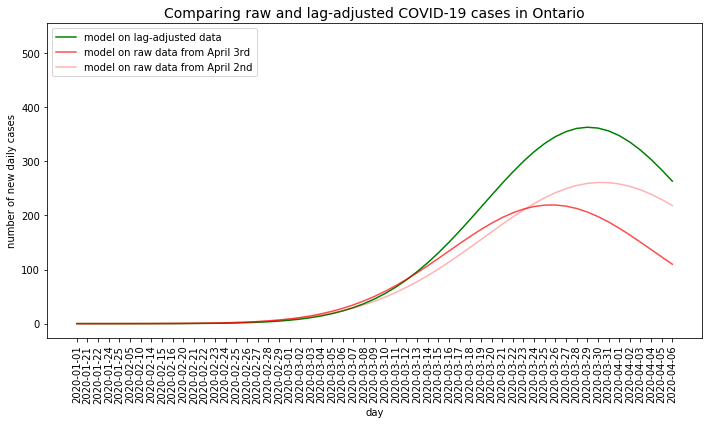

In [12]:
# Figure 6

color = 'k'
fig, ax1 = plt.subplots(facecolor='w', figsize=(10,6))
ax1.set_title('Comparing raw and lag-adjusted COVID-19 cases in Ontario',fontsize=14)

ax1.set_xlabel('day')
ax1.set_ylabel('number of new daily cases', color=color)
ax1.scatter(*data1, color=color, alpha = 0, label='')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=90)


ax1.plot(fx(Xx,*c_params), c='g', label = 'model on lag-adjusted data')

ax1.plot(fx(Xx,*params), c='r',alpha=0.7, label = 'model on raw data from April 3rd')
ax1.plot(fx(Xx,*params0), c='r',alpha=0.3, label = 'model on raw data from April 2nd')
fig.tight_layout()
plt.legend()
plt.savefig('./o_figures/figure6.png', dpi=300)

plt.show()

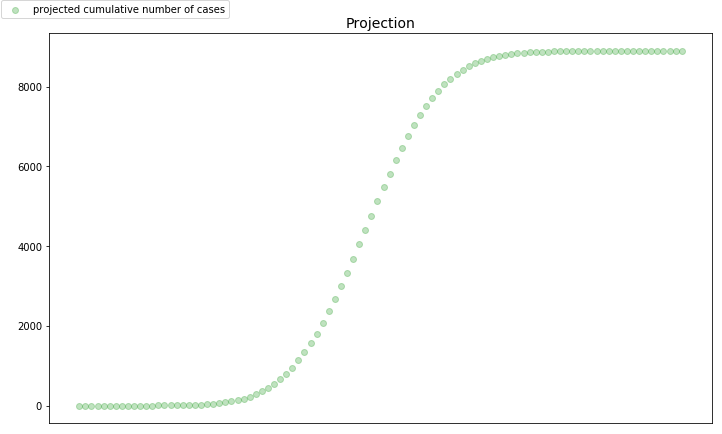

estimated total after 100 days: 8,889


In [13]:

days = 100
t = np.linspace(0,days,days)

y1 = fx(t,*c_params)
red = [Xx, yy]
blue = [t, np.cumsum(y1)]



fig, ax1 = plt.subplots(facecolor='w', figsize=(10,6))
ax1.set_title('Projection', fontsize=14)


color = 'tab:green'
ax1.scatter(*blue, color=color, alpha=0.3, label = 'projected cumulative number of cases')


fig.legend(borderaxespad=0.1, loc='upper left')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.tight_layout()


plt.show()

print('estimated total after {0} days: {1:,}'.format(days,int(np.cumsum(y1)[-1])))

In [14]:
corrected

,date,daily,total,lag_factor,corrected_daily,corrected_total
0,2020-01-01,1,1,1.000000,1.000000,1.000000
1,2020-01-21,1,2,1.000000,1.000000,2.000000
2,2020-01-22,1,3,1.000000,1.000000,3.000000
3,2020-01-24,1,4,1.000000,1.000000,4.000000
4,2020-01-25,1,5,1.000000,1.000000,5.000000
5,2020-02-05,1,6,1.000000,1.000000,6.000000
6,2020-02-10,1,7,1.000000,1.000000,7.000000
7,2020-02-14,2,9,1.000000,2.000000,9.000000
8,2020-02-15,1,10,1.000000,1.000000,10.000000
9,2020-02-16,1,11,1.000000,1.000000,11.000000
